In [1]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

%matplotlib inline


image_bank = {}

In [2]:
def get_image(filename='img/gears1.png'):
    if filename in image_bank.keys():
        return image_bank[filename]
    
    img = cv2.imread(filename, 0)
    img[img > 50] = 255
    img[img <= 50] = 0
    image_bank[filename] = img
    return image_bank[filename]


def plot_image(image, size=(3, 3)):
    image = image.astype(np.uint8)
    fig, ax = plt.subplots(figsize=size,  dpi=300)
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    plt.show()

    
def ring(r):
    Y, X = np.ogrid[:dimx, :dimy]
    distance_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    
    mask = (small_radius <= distance_from_center) & \
        (distance_from_center <= big_radius)
        
    return mask
    
def ring(r):
    d = 2 * r + 1
    rx, ry = d / 2, d / 2
    x, y = np.indices((d, d))
    distance = np.hypot(rx - x, ry - y)
    mask = np.abs(distance - r) < 0.5
    return mask.astype('uint8')

# Исходное изображение

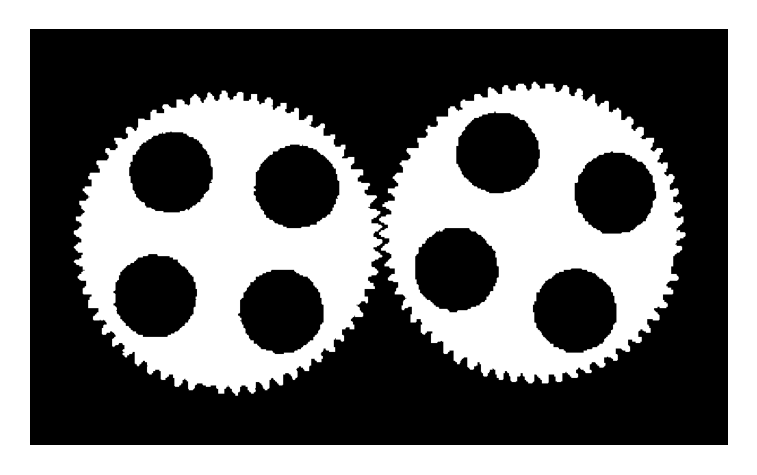

In [3]:
plot_image(get_image())

In [4]:
def erode(image, kernel, iterations=1):
    return cv2.erode(image, kernel, iterations)


def find_holes():
    return erode(get_image(), ring(70))

# Центры дырок

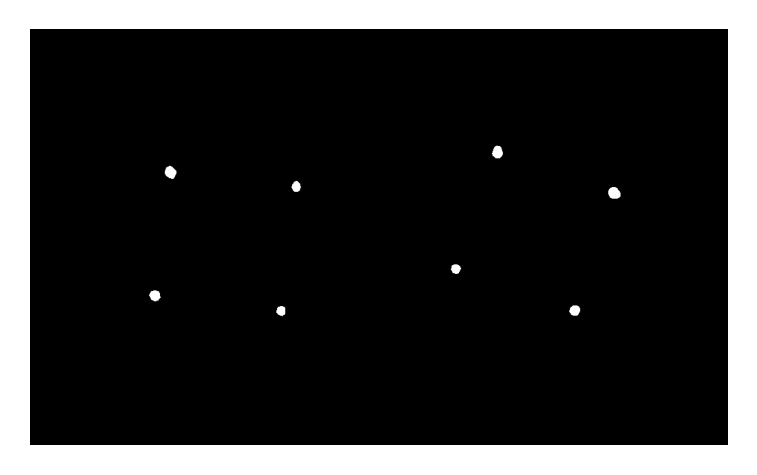

In [5]:
step1 = find_holes()
plot_image(step1)

In [6]:
def dilate(image, kernel, iterations=1):
    return cv2.dilate(image, kernel, iterations)


def ellipse(size):
    return cv2.getStructuringElement(cv2.MORPH_ELLIPSE, size)


def dilate_centers():
    return dilate(step1, ellipse((150, 150)))

# Расширение центров

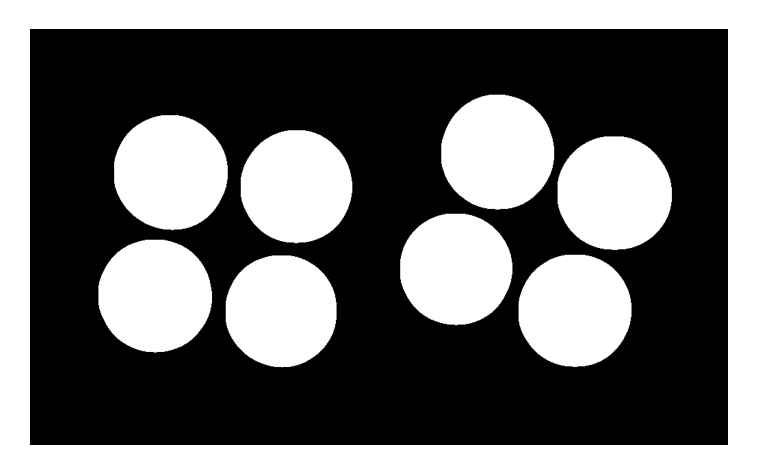

In [7]:
step2 = dilate_centers()
plot_image(step2)

In [8]:
def delete_holes():
    image = get_image().copy()
    image += step2
    return image

# Удаление дырок

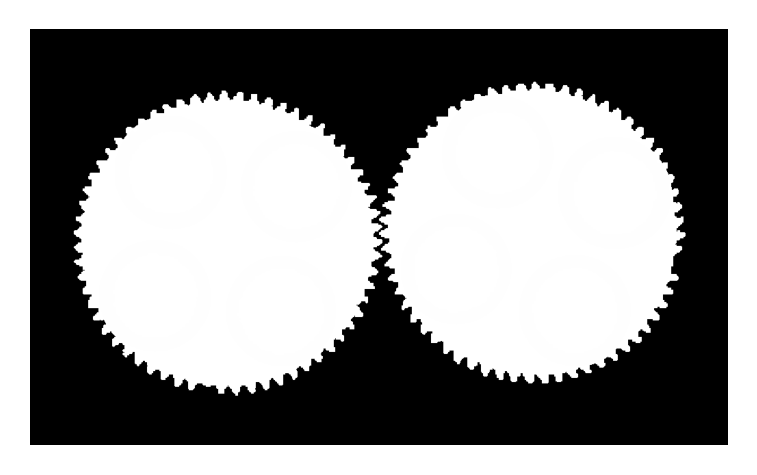

In [9]:
step3 = delete_holes()
plot_image(step3)

# Выделение области зубцов

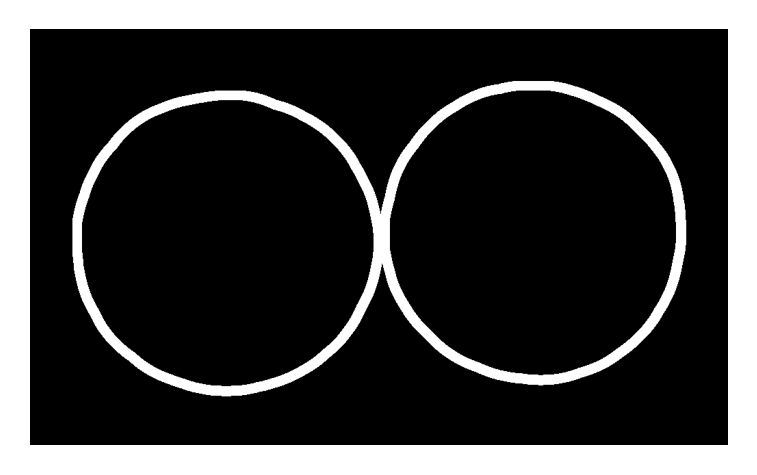

In [10]:
def find_rings():
    closure = cv2.morphologyEx(step3, cv2.MORPH_OPEN, ellipse((270, 270)))
    rings = cv2.subtract(cv2.dilate(closure, ellipse((30, 30))), closure)
    return np.vectorize(lambda x: 1 if x > 50 else 0)(rings).astype('uint8')


step4 = find_rings()
plot_image(step4)

# Выделение зубцов 

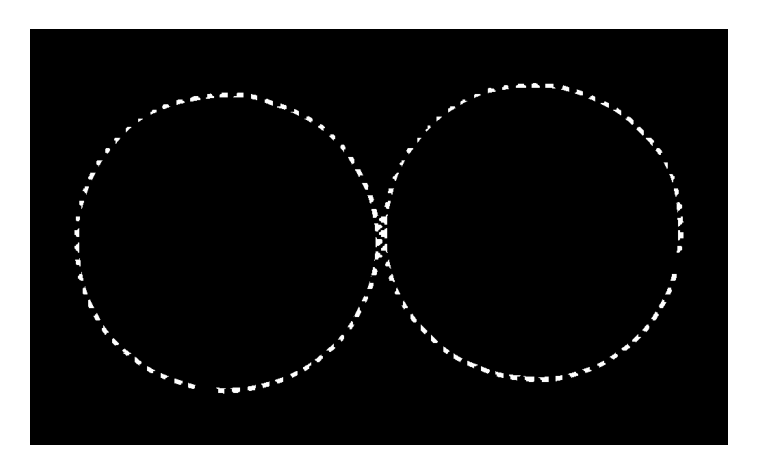

In [11]:
step5 = (step3) * (erode(step4, ring(4)))
plot_image(step5)

# Соединение рядом стоящий зубцов

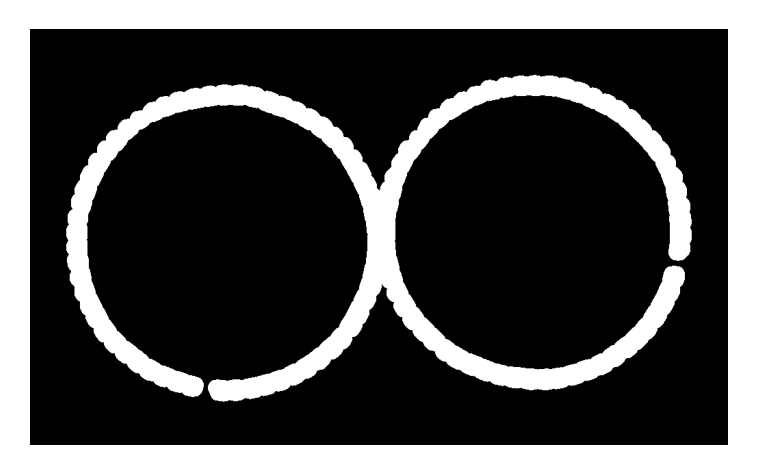

In [12]:
step6 = dilate(step5, ellipse((25, 25)))
step6 = np.vectorize(lambda x: 1 if x > 50 else 0)(step6).astype('uint8')
plot_image(step6)

# Вычитание соединенных зубцов из всей области

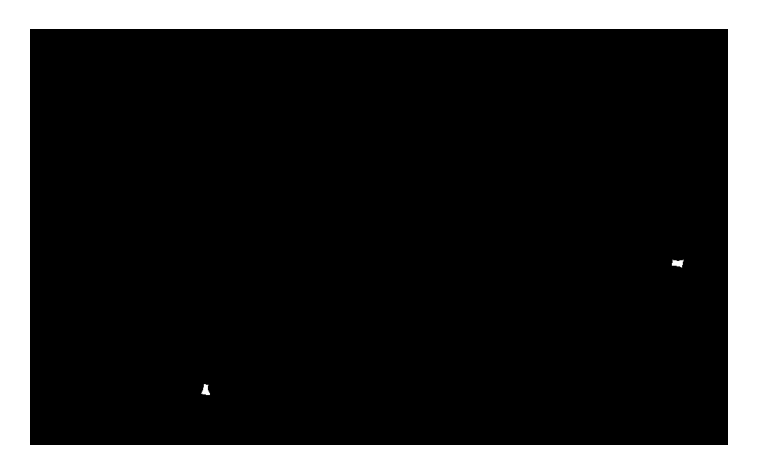

1

In [13]:
step7 = cv2.subtract(step4, step6)
plot_image(step7)
step4.max()

# Выделение этих областей

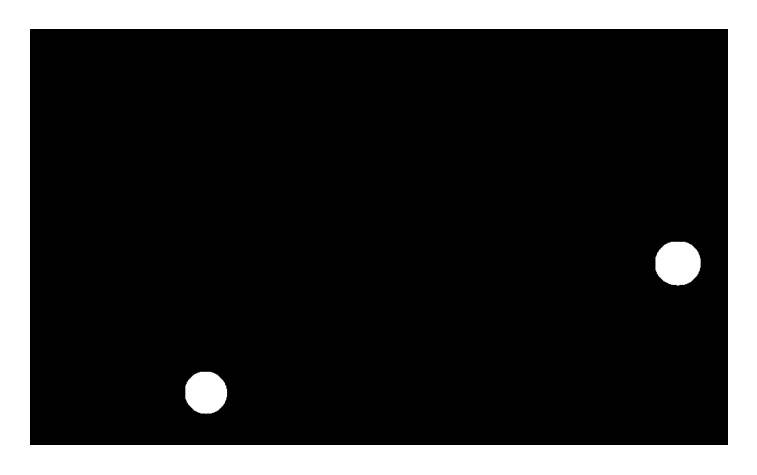

In [14]:
step8 = dilate(erode(step7, ellipse((10, 5))), ellipse((60, 60)))
plot_image(step8)

# Результат

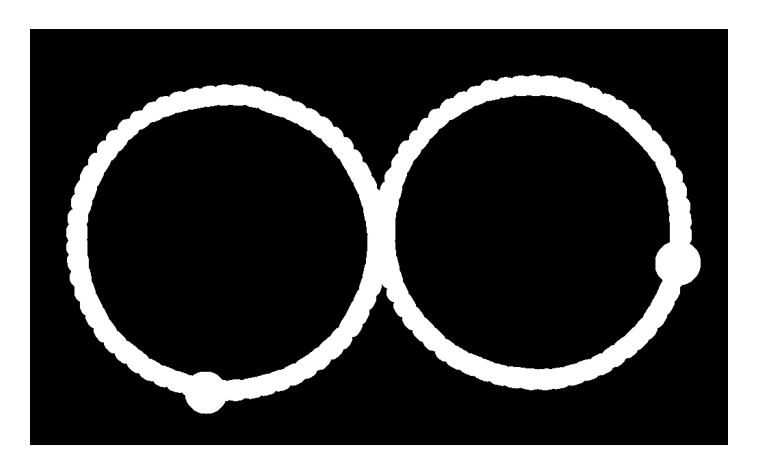

In [15]:
step9 = step8 + step6
step9 = np.vectorize(lambda x: 1 if x > 0 else 0)(step9).astype('uint8')
plot_image(step9)